# List of examples of the use of the NLP and Sentiment Analysis in science or practice with references to the literature

- Virtual assistants like Siri, Alexa and Google Assistant
- Translation tools like Gooogle Translate
- Customer service / feedback chatbots
- Product reviews analysis
- Market sentiment (news and social media)

Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics. 2011.

Muhammad Taimoor Khan, Mehr Durrani, Armughan Ali, Irum Inayat, Shehzad Khalid & Kamran Habib Khan. Sentiment analysis and the complex natural language. Complex Adaptive Systems Modeling. Volume 4, article number 2. 2016.

Anuja P Jain, Padma Dandannavar. Application of machine learning techniques to sentiment analysis. International Conference on Applied and Theoretical Computing and Communication Technology (iCATccT). 2016.

# Indication of the selected library, functions and functions’ parameters

- Natural Language Toolkit - https://www.nltk.org/
- Porter Stemmer algorithm - https://tartarus.org/martin/PorterStemmer/def.txt
- Word-Emotion association - https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm
- Scikit-Learn - https://scikit-learn.org/stable/

In [ ]:
#pip install pandas beautifulsoup4==4.12.3 nltk==3.8.1 wordcloud==1.9.4 matplotlib==3.8.4 nrclex numpy==1.26.4 scikit-learn==1.4.2 

In [1]:
import pandas as pd #data processing
from bs4 import BeautifulSoup #HTML tag removing
import re #regular expressions for special characters handling
import nltk
from nltk.tokenize import word_tokenize #tokenization using NLTK library
from nltk.corpus import stopwords #stopwords dictionary
from nltk.stem.porter import PorterStemmer #stemming algorithm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #numerical representation of text
from wordcloud import WordCloud #Graphical representation of top-word in reviews
import matplotlib.pyplot as plt #plots
from nltk.corpus import opinion_lexicon #dictionary of positive and negative words provided by Standford university
#import warnings
#warnings.filterwarnings("ignore", category=UserWarning, module='nltk') #to avoid warnings 
import numpy as np
from nrclex import NRCLex #Word Emotion Association Lexicon
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.metrics import classification_report #precision, recall
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.svm import SVC #Support Vector Classifier

Function to predict the sentiment of the review given the model. 

In [2]:
def preprocess_predict(rev, model, pattern=r"[^a-zA-Z\s']"):
    # Preprocess the text
    rev = BeautifulSoup(rev).get_text() #HMTL
    rev = re.sub(pattern, '', rev) #special characters
    rev = word_tokenize(rev) #tokenization
    rev = [word.lower() for word in rev if word.lower() not in stopwords_list] #stopwords
    rev = [stemmer.stem(word) for word in rev] #stemmization 
    processed_rev = ' '.join(rev) #single string rather than separate words

    processed_rev = tfidf.transform([processed_rev]) #TF-IDF vectorization
 
    # Predict sentiment
    prediction = model.predict(processed_rev)
    return prediction[0]

Function to assign sentiment score for a tokenized review.

In [3]:
def assign_sent_scores(review, positive_words, negative_words):
    pos_count = sum(1 for word in review if word in positive_words) #sum of positive words
    neg_count = sum(1 for word in review if word in negative_words) #sum of negative words
    return pos_count - neg_count 

Function to analyze emotional sentiment of a review. 

In [4]:
def get_emotion_scores(review):
    emotion = NRCLex(review) #initializing the emotion analyis
    
    emotion_scores = emotion.raw_emotion_scores #dictionary of emotions

    ##obtain emotion scores
    emotion_results = {'anger': emotion_scores.get('anger', 0),
                       'anticipation': emotion_scores.get('anticipation', 0),
                       'disgust': emotion_scores.get('disgust', 0),
                        'fear': emotion_scores.get('fear', 0),
                        'joy': emotion_scores.get('joy', 0),
                        'sadness': emotion_scores.get('sadness', 0),
                        'surprise': emotion_scores.get('surprise', 0),
                        'trust': emotion_scores.get('trust', 0),
                        'negative': emotion_scores.get('negative', 0),
                        'positive': emotion_scores.get('positive', 0),
    }
    return emotion_results

# Data set characteristics

Large Movie Review Dataset source - https://ai.stanford.edu/~amaas/data/sentiment/

Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).

In [5]:
movie_data=pd.read_csv('IMDB Dataset.csv') 

In [6]:
print(f'Dataset shape: ', movie_data.shape)

Dataset shape:  (50000, 2)


50 000 reviews labelled as either positive or negative

5 first reviews

In [7]:
print(movie_data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
print("Missing values:\n", movie_data.isnull().sum())

Missing values:
 review       0
sentiment    0
dtype: int64


### Column characteristics

In [9]:
print(f'Number of non-unique reviews: ', movie_data['review'].nunique())

Number of non-unique reviews:  49582


Reviews are not unique. It may happen due to single-word review. Some of them are duplicated intentionally by author to balance the target variable.

In [10]:
non_unique = movie_data.groupby('review').filter(lambda x: len(x) > 1)
print(non_unique.sort_values('review'))

                                                  review sentiment
34058  "Go Fish" garnered Rose Troche rightly or wron...  negative
47467  "Go Fish" garnered Rose Troche rightly or wron...  negative
29956  "Three" is a seriously dumb shipwreck movie. M...  negative
31488  "Three" is a seriously dumb shipwreck movie. M...  negative
47527  "Witchery" might just be the most incoherent a...  negative
...                                                  ...       ...
47876  this movie sucks. did anyone notice that the e...  negative
44122  well, the writing was very sloppy, the directi...  negative
23056  well, the writing was very sloppy, the directi...  negative
10163  when I first heard about this movie, I noticed...  positive
15305  when I first heard about this movie, I noticed...  positive

[824 rows x 2 columns]


In [11]:
movie_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Data is balanced. Duplicates are allowed for balancing the data. 

### HTML tags

In [12]:
movie_data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Reviews may contain HTML tags like \<br>, therefore text HTML pre-processing is needed. If review does not have any HTML elements, warning may appear.

In [13]:
movie_data['clean_review'] = movie_data['review'].apply(lambda rev: BeautifulSoup(rev).get_text())

C:\Windows\Temp\ipykernel_10328\314088864.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  movie_data['clean_review'] = movie_data['review'].apply(lambda rev: BeautifulSoup(rev).get_text())


In [14]:
#movie_data['clean_review'][0]

### Special characters

Special characters and digits like #, $, % should be removed. Only spaces and letters are left in review. The only non-whitespace symbol allowed is apostrophe to be handled by stopword dictionary.

In [15]:
pattern=r"[^a-zA-Z\s']" 
movie_data['clean_review'] = movie_data['clean_review'].apply(lambda rev: re.sub(pattern, '', rev))

In [16]:
#movie_data['clean_review'][0]

### Text tokenization

Tokenization is the process of breaking down sentences into smaller, more manageable units. The task is to split the review into separate words.

In [17]:
movie_data['clean_token_review'] = movie_data['clean_review'].apply(word_tokenize)

In [18]:
#movie_data['clean_token_review'][0]

### Stopwords 

For NLP modelling, stopwords do not add much value. By removing them, we focus only on the most important information. Case of the words is ignored to ensure that all of stopwords are correctly removed. 

In [19]:
stopwords_list = stopwords.words('english')
stopwords_list[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
movie_data['clean_token_review'] = movie_data['clean_token_review'].apply(lambda rev: [word.lower() for word in rev if word.lower() not in stopwords_list])

In [21]:
#movie_data['clean_token_review'][0]

### Stemming

Stemming aims to cut off the ends of words in order to obtain correct root form. Another option would be to use lemmatization - use base, dictionary form of a word. 

We use Porter Stemmer algorithm - set of morphological rules applied to English (e.g. sses --> ss; ies --> i)

In [22]:
stemmer = PorterStemmer()

movie_data['clean_stem_review'] = movie_data['clean_token_review'].apply(lambda rev: [stemmer.stem(word) for word in rev])

In [23]:
#movie_data['clean_stem_review'][0]

# Empirical analysis (goal, assumptions, results, interpretation)

Goal of the analysis is to correctly predict sentiment of the review using Machine Learning models.

In [24]:
X=movie_data['clean_stem_review']
y=movie_data['sentiment']

In [25]:
X = X.astype(str)  
y = y.astype(str)

As data is balanced there is no reason to stratify target variable. Number of observations is large enough to use 30% test size. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3) 

### Numerical representation of text

The first approach would have been Count Vectorizer. For each review, it counts the occurrences of each word helping to identify the most popular words for positive and negative reviews. It is simple and intuitive measure, however doesn't considering the importance of words within the entire dataset. 

For this purpose, TF-IDF model is used. 
- Term Frequency (TF) measures how often a word appears in a review, relative to the total words in that dataset.
- Inverse Document Frequency (IDF) measures how common a word is across all reviews. The more reviews a word appears in, the lower its IDF score, reducing its weight. Words that are rare in the dataset get higher IDF scores.

We focus on TF-IDF approach, as we assume that rare words may have greater power to distingiush sentiment.

We fit to the training data only to avoid data leakage.

In [27]:
tfidf = TfidfVectorizer()
train_x_tfidf = tfidf.fit_transform(X_train)
test_x_tfidf = tfidf.transform(X_test)

### Top words

Dictionary of words appearing in reviews based on the term frequency and inverse document frequency. 

In [28]:
feature_names = tfidf.get_feature_names_out()
tfidf_scores = train_x_tfidf.sum(axis=0).A1
word_frequencies = dict(zip(feature_names, tfidf_scores))
top_10_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_words 

[('movi', 1843.483371278698),
 ('film', 1544.887345097486),
 ('one', 917.327820975015),
 ('like', 841.5243539376964),
 ('watch', 705.0867676543776),
 ('good', 692.0537966219316),
 ('time', 653.4612625297224),
 ('see', 642.6456435047278),
 ('charact', 621.208675977719),
 ('make', 619.7253827989489)]

Word Cloud is used as graphical representation of the top words in reviews. 

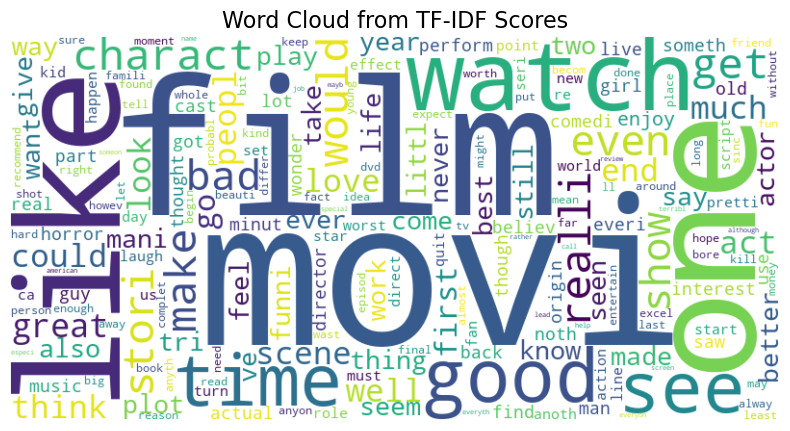

In [29]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Plot the word cloud.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from TF-IDF Scores", fontsize=16)
plt.show()

### Dictionary-based approach 

To analyze sentiment of a review we can use lexicon provided by Standford university. Lists of words are added to GitHub by authors. We label review as positive when score is positive (sum of positive words prevails). 

In [30]:
nltk.download('opinion_lexicon') #download opinion dictionary
nltk.download('punkt')
positive_wds = set(opinion_lexicon.positive()) #https://gist.github.com/mkulakowski2/4289437
negative_wds = set(opinion_lexicon.negative()) #https://gist.github.com/mkulakowski2/4289441

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Ярослав\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ярослав\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We can test the dictionary on some made up short reviews. 

In [31]:
new_reviews = [
    "The movie was fantastic! I loved it.",
    "It was okay, not the best but not the worst.",
    "The plot was boring and predictable."
]
new_reviews_token = [word_tokenize(review) for review in new_reviews]

In [32]:
scores = [assign_sent_scores(review, positive_wds, negative_wds) for review in new_reviews_token]
categories = ["Positive" if score > 0 else "Negative" if score < 0 else "Neutral" for score in scores]
results_nltk = pd.DataFrame({
    "Review": new_reviews,
    "Sentiment Score": scores,
    "Category": categories
})
results_nltk

,Review,Sentiment Score,Category
0,The movie was fantastic! I loved it.,2,Positive
1,"It was okay, not the best but not the worst.",0,Neutral
2,The plot was boring and predictable.,-2,Negative


Now we can apply the method to our cleaned data. 

In [33]:
scores = [assign_sent_scores(review, positive_wds, negative_wds) for review in movie_data['clean_token_review']]
categories = ["Positive" if score > 0 else "Negative" if score < 0 else "Neutral" for score in scores]

In [34]:
results_nltk = pd.DataFrame({
    "Review": movie_data['clean_review'],
    "Sentiment Score": scores,
    "Category": categories
})
results_nltk

,Review,Sentiment Score,Category
0,One of the other reviewers has mentioned that ...,-7,Negative
1,A wonderful little production The filming tech...,10,Positive
2,I thought this was a wonderful way to spend ti...,5,Positive
3,Basically there's a family where a little boy ...,-4,Negative
4,Petter Mattei's Love in the Time of Money is a...,13,Positive
...,...,...,...
49995,I thought this movie did a down right good job...,13,Positive
49996,Bad plot bad dialogue bad acting idiotic direc...,-9,Negative
49997,I am a Catholic taught in parochial elementary...,-6,Negative
49998,I'm going to have to disagree with the previou...,-7,Negative


In [35]:
results_nltk['Category'].value_counts()

Category
Positive    25597
Negative    21129
Neutral      3274
Name: count, dtype: int64

### Dictionary-based approach for sentiment analysis with emotions

For the purpose of sentiment analysis with 8 basic emotion assosiation (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) we use dictionary of National Research Council Canada. 

First we test on sample data.

In [36]:
emot_reviews = ["The movie was absolutely thrilling! I loved every second of it, especially the plot twist at the end. The actors did a fantastic job and the direction was superb. Can't wait to see the next one!",
                 "This movie was a total waste of time. The acting was terrible, the plot was predictable, and the pacing was so slow. I regret spending money on this.",
                "I was really disappointed with the movie. Some scenes were enjoyable, but others were downright disturbing. The special effects were great, though. I expected more from the director."]

In [37]:
emotion_data = [get_emotion_scores(review) for review in emot_reviews]
pd.DataFrame(emotion_data)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,0,2,0,0,1,0,1,0,1,3
1,2,2,2,1,1,2,1,1,3,1
2,1,1,1,0,1,1,0,2,1,2


Same for prepared data.

In [38]:
emotion_data = [get_emotion_scores(review) for review in movie_data['clean_review']]
emotion_results = pd.DataFrame(emotion_data)
emotion_results

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,11,6,3,13,2,11,1,9,20,7
1,0,2,1,2,2,1,1,4,1,14
2,2,7,1,0,3,1,2,4,1,6
3,2,2,1,3,1,4,2,2,5,2
4,1,10,0,3,9,2,5,7,2,14
...,...,...,...,...,...,...,...,...,...,...
49995,1,12,0,1,8,0,3,8,1,15
49996,6,3,5,5,2,5,0,1,8,3
49997,4,8,1,7,7,5,1,13,10,14
49998,7,3,5,7,2,4,2,6,10,9


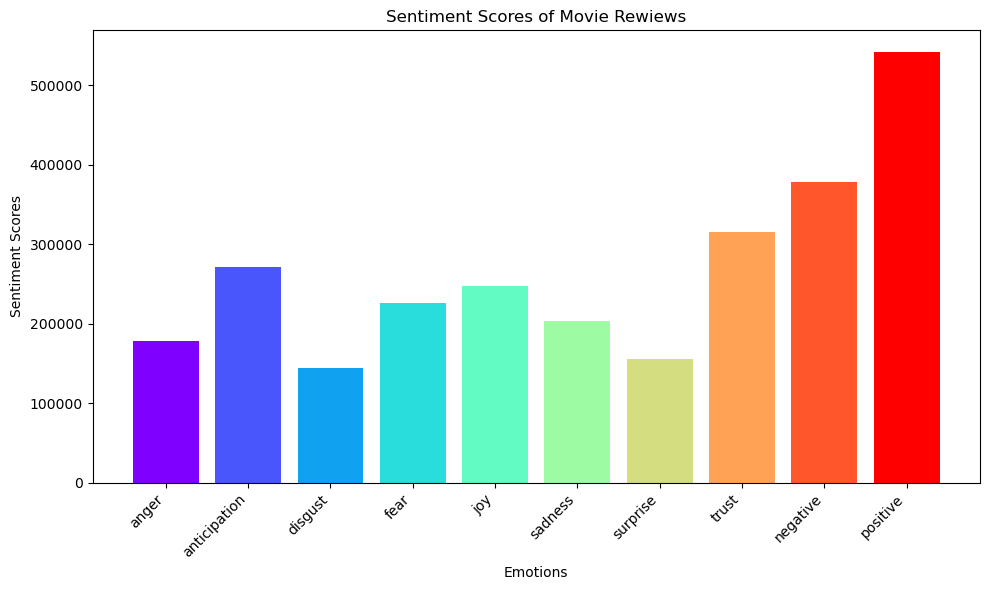

In [35]:
emotion_sums = emotion_results.sum() #sum of emotions scores
plt.figure(figsize=(10, 6))
plt.bar(emotion_sums.index, emotion_sums.values, color=plt.cm.rainbow(np.linspace(0, 1, len(emotion_sums))))

# Customize the plot
plt.xlabel('Emotions')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Scores of Movie Rewiews')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()

### Basic logistic regression

In our project we use traditional Machine Learning models - Logistic Regression and Support Vector Machines. Naive Bayesian Classifier is effective for text classification but will be discussed on the lectures later. Neural networks like Recurrent Neural Networks (RNNs) are not used as number of observations is not sufficient for neural network to be efficient in terms of computation terms. 

In [40]:
log_reg = LogisticRegression()
log_reg.fit(train_x_tfidf,y_train)

LogisticRegression()

In [41]:
print(confusion_matrix(y_test,
                           log_reg.predict(test_x_tfidf),
                           labels = ['positive', 'negative']))

[[6828  761]
 [ 907 6504]]


761 cases where the model incorrectly predicted review as "negative" when the actual review was "positive"

907 cases where predicted was "positive" when in fact it is "negative"

In [42]:
print(classification_report(y_test,
                            log_reg.predict(test_x_tfidf),
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.88      0.90      0.89      7589
    negative       0.90      0.88      0.89      7411

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



### Support Vector Classifier

The goal of an SVM classifier is to find a decision boundary that best separates the data points of different classes. 

In [45]:
svc = SVC()
svc.fit(train_x_tfidf, y_train)

SVC()

In [46]:
print(confusion_matrix(y_test,
                           svc.predict(test_x_tfidf),
                           labels = ['positive', 'negative']))

[[6903  686]
 [ 882 6529]]


In [47]:
print(classification_report(y_test,
                            svc.predict(test_x_tfidf),
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.89      0.91      0.90      7589
    negative       0.90      0.88      0.89      7411

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



### Predict sentiment of a new review with SVC model

Using the function described above we can predict the sentiment with ML model

In [48]:
# Example of model usage
new_review = "An absolutely fantastic film! The actors gave such powerful performances. Highly recommend it!"
sentiment = preprocess_predict(new_review, svc)
print(f"Sentiment: {sentiment}")

Sentiment: positive


In [49]:
new_review = "I had high hopes, but this movie fell flat. The story made no sense. Definitely not worth watching."
sentiment = preprocess_predict(new_review, svc)
print(f"Sentiment: {sentiment}")

Sentiment: negative


In [44]:
new_review = "The movie had moments of brilliance, especially with the stunning cinematography and the lead actor's heartfelt performance. However, the plot felt unnecessarily convoluted, leaving me confused and disengaged at times. While the music score was mesmerizing and elevated some scenes, the pacing dragged in the second half, making it hard to stay invested. I appreciate the director's ambition, but the execution fell short of the emotional depth it aimed to achieve. It's neither a complete triumph nor a total disaster—just a missed opportunity."
sentiment = preprocess_predict(new_review, log_reg)
print(f"Sentiment: {sentiment}")

Sentiment: negative


In [50]:
new_review = "The movie had moments of brilliance, especially with the stunning cinematography and the lead actor's heartfelt performance. However, the plot felt unnecessarily convoluted, leaving me confused and disengaged at times. While the music score was mesmerizing and elevated some scenes, the pacing dragged in the second half, making it hard to stay invested. I appreciate the director's ambition, but the execution fell short of the emotional depth it aimed to achieve. It's neither a complete triumph nor a total disaster—just a missed opportunity."
sentiment = preprocess_predict(new_review, svc)
print(f"Sentiment: {sentiment}")

Sentiment: negative
